#**Behavioral Cloning** 


#### Install the envirement
For the project I have installed the following packages and programs (environment-gpu.yml file):

#### Load The Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_column_names = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
data_df = pd.read_csv('./data/driving_log.csv',header=0,names=data_column_names)

#### Dataset Exploration
For the project I used the street pictures of Udacity; The Tour around the lake. I had joystick problems and got no good street pictures (too many on the roadside and too few in the middle of the street).

Structure of the image index file and the measured values:

In [12]:
data_df.iloc[:3]

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011


A picture of a left, a central and a right camera was recorded for each measurement at the same time (8036 measurements). Each image has the size of 320x160x3.

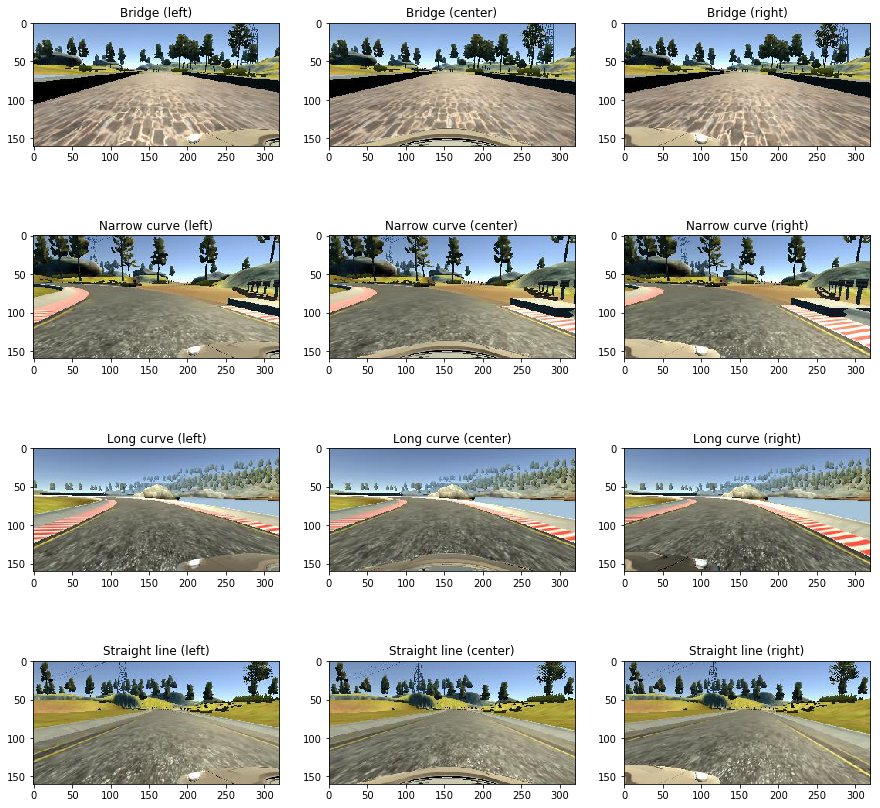

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

def show_picture(file_with_path, title, grid, position):
    ax = plt.subplot2grid(grid, position)
    img = mpimg.imread(file_with_path)
    ax.imshow(img) 
    ax.set_title(title)
    
    
plt.rc('figure', figsize=(15,15))

steering_threshold = 0.0
data_df2 = data_df[data_df.steering == steering_threshold].head(1)

show_picture('./data/IMG/left_2016_12_01_13_30_48_287.jpg', "Bridge (left)", (4,3), (0,0))
show_picture('./data/IMG/center_2016_12_01_13_30_48_287.jpg', "Bridge (center)", (4,3), (0,1))
show_picture('./data/IMG/right_2016_12_01_13_30_48_287.jpg', "Bridge (right)", (4,3), (0,2))

show_picture('./data/IMG/left_2016_12_01_13_31_15_513.jpg', "Narrow curve (left)", (4,3), (1,0))
show_picture('./data/IMG/center_2016_12_01_13_31_15_513.jpg', "Narrow curve (center)", (4,3), (1,1))
show_picture('./data/IMG/right_2016_12_01_13_31_15_513.jpg', "Narrow curve (right)", (4,3), (1,2))

show_picture('./data/IMG/left_2016_12_01_13_33_54_068.jpg', "Long curve (left)", (4,3), (2,0))
show_picture('./data/IMG/center_2016_12_01_13_33_54_068.jpg', "Long curve (center)", (4,3), (2,1))
show_picture('./data/IMG/right_2016_12_01_13_33_54_068.jpg', "Long curve (right)", (4,3), (2,2))

show_picture('./data/IMG/left_2016_12_01_13_45_11_498.jpg', "Straight line (left)", (4,3), (3,0))
show_picture('./data/IMG/center_2016_12_01_13_45_11_498.jpg', "Straight line (center)", (4,3), (3,1))
show_picture('./data/IMG/right_2016_12_01_13_45_11_498.jpg', "Straight line (right)", (4,3), (3,2))


In [14]:
print("Count of all images: {}".format((data_df['center'].count()) * 3))

Count of all images: 24108


In [12]:
print("Histogram of the use of the brake: {}".format((data_df['brake'].value_counts() + 1)))

Histogram of the use of the brake: 0.000000    8004
1.000000       6
0.326939       4
0.414081       4
0.268844       3
0.394716       3
0.433446       3
0.811061       2
0.617412       2
0.036465       2
0.985345       2
0.375351       2
0.075195       2
0.191385       2
0.142972       2
0.336621       2
0.820743       2
0.443128       2
0.510905       2
0.220432       2
0.046148       2
0.026783       2
0.772331       2
Name: brake, dtype: int64


The tour around the lake has no slope. For the most images, the maximum speed has been driven. That's why I decided to maintain the existing speed in drive.py. The neuronal network will not change the speed.

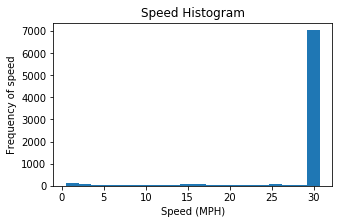

In [23]:
plt.figure(figsize=(5,3))
plt.hist(data_df['speed'], 20)
plt.title("Speed Histogram")
plt.xlabel('Speed (MPH)')
plt.ylabel('Frequency of speed')
plt.show()  

With positive steering angles, the wheels steer right and the car moves to the right. If the steering angle is negative then the car moves to the left.

The steering angle is usually 0 degree (no steering). 10% of the steering angle measurement is less than -0.2 or greater than 0.2 degrees. This distribution is unfavorable for learning. 

For the training data I leave the existing steering angle for the central road image per measurement. For the right and left image per measurement, I change the steering angle so that the car always strives to drive in the middle of the road. An exact description follows.


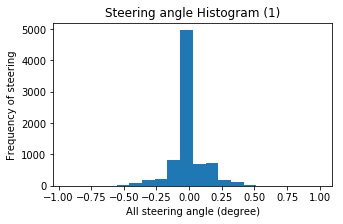

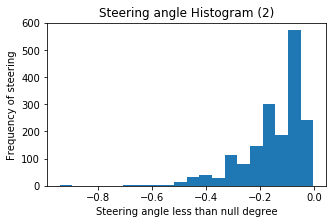

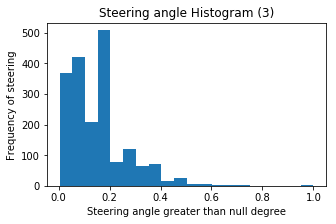

In [26]:
plt.figure(figsize=(5,3))
plt.hist(data_df['steering'], 20)
plt.title("Steering angle Histogram (1)")
plt.xlabel('All steering angle (degree)')
plt.ylabel('Frequency of steering')
plt.show()

plt.figure(figsize=(5,3))
plt.hist(data_df.query('steering < 0')['steering'], 20)
plt.title("Steering angle Histogram (2)")
plt.xlabel('Steering angle less than null degree')
plt.ylabel('Frequency of steering')
plt.show()

plt.figure(figsize=(5,3))
plt.hist(data_df.query('steering > 0')['steering'], 20)
plt.title("Steering angle Histogram (3)")
plt.xlabel('Steering angle greater than null degree')
plt.ylabel('Frequency of steering')
plt.show()


In [32]:
print("All steering angle measurements less than or equal -0.2 degree: {}".\
      format(data_df.query('steering <= -0.2')['steering'].count()))

All steering angle measurements less than or equal -0.2 degree: 464


In [33]:
print("All steering angle measurements greater than or equal 0.2 degree: {}".\
      format(data_df.query('steering >= 0.2')['steering'].count()))

All steering angle measurements greater than or equal 0.2 degree: 395


### Model Architecture and Training Strategy
#### 1. An appropriate model architecture has been employed

I have used a LeNet architecture:
- I leave the pictures in their original size
- lambda_2: In the first layer, I use the normalization of the image as a lambda function
- My model consists of Convolution2d layers with 3x3 filter (kernel). The strikes in X, Y directions are 1 and the border mode is same. I used Relu for activation. The Poolsize is 2 x 2 and the border mode valid (default values)
- Convolution2d_8/MaxPooling2d_8: These two layers have shortened the number of epochs by 8 epochs; It has quickly set the loss value around 0.0150
- With the Convolution2D Layers, the number of output filters increases, so more complex characteristics can be stored


Problem: I can't set names for the layers

#### 2. Attempts to reduce overfitting in the model
After the flaten layer I set four Dense layer. Against the overfitting I use three Dropout layers with a value of 0.5.

The last layer is Dense(1), since I only expect a steering angle value. He has not a dropout layer.

#### 3. Model parameter tuning
- EPOCHS = 12
- BATCH_SIZE = 32 (default value in keras for fit())
- Optimizer = Adam
- Learning rate = 0.001
- loss-function = mse

#### 4. Appropriate training data
There are more straight and easy curve images than narrow curves. This makes learning driving in tight curves a little more difficult. I replace the left and the right image with new steering angles values per measurement. These are calculated from the existing Sterring value +/-0.5. The limits of +/-1.0 must not be exceeded. After the steering angles adjustment, I mirror all the images and adjust the steering angles value (x -1.0) accordingly. The reflection is necessary because some images are missing from the narrow curves. As the tour around the lake was done in both directions, the reflection can replace the missing images.

This results in the following values:
count of steering values: 48216

validation_split=0.2

80% training data: 38572

20% validation data: 9644

I did not collect test data from the pictures because the simulator does the testing.

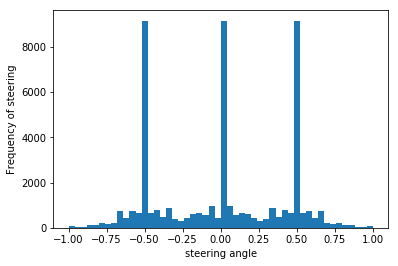

count of steering values: 48216


In [55]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imgaug import augmenters as iaa
%matplotlib inline

flipper = iaa.Fliplr(1.0) # always horizontally flip each input image
scaler = iaa.Affine(scale={"y": (0.8, 1.2)}) # scale each input image to 80-120% on the y axis
gaussian_noise = iaa.AdditiveGaussianNoise(loc=32, scale=0.05*255, name="smale noise")
rotate = iaa.Affine(rotate=(-5, 5))
grayscale = iaa.Grayscale(alpha=(0.0, 1.0))


images = []
steerings = []
for _, row in data_df.iterrows():
    img_center = mpimg.imread('./data/' + row['center'].strip())#[60:130, :, :] 
    images.append(img_center)
    steering_threshold = float(row['steering'])
    steerings.append(steering_threshold)

    images.append(flipper.augment_image(img_center)) 
    steerings.append(-1.0 * steering_threshold)

    img_left_orginal = mpimg.imread('./data/' + row['left'].strip()) #.squeeze()[40:130, :, :]
    img_left1 = img_left_orginal #[60:130, :, :]
    images.append(img_left1)
    steering_threshold2 = min(1.0, steering_threshold + 0.5)
    steerings.append(steering_threshold2)
    
    images.append(flipper.augment_image(img_left1)) # probably vertically flip image 
    steerings.append(-1.0 * steering_threshold2)
 

    img_right_original = mpimg.imread('./data/' + row['right'].strip()) #.squeeze()[40:130, :, :]
    img_right1 = img_right_original #[60:130, :, :]
    images.append(img_right1)
    steering_threshold2 = max(-1.0, steering_threshold - 0.5)
    steerings.append(steering_threshold2)
                     
    images.append(flipper.augment_image(img_right1)) # probably vertically flip image 
    steerings.append(-1.0 * steering_threshold2)


plt.hist(steerings, 50)
plt.xlabel('steering angle')
plt.ylabel('Frequency of steering')
plt.show()

print("count of steering values: {}".format(len(steerings)))


### Model Architecture and Training Strategy
#### 1. Solution Design Approach
The following steps describe the development of the neural network and the training data
-  Step1: Replace the left and the right image with new steering angles values per measurement. These are calculated from the existing Sterring value +/-0.2. After the steering angles adjustment, I mirror all the images and adjust the steering angles value (x -1.0) accordingly
- Step2: My first approach was a layer for normalization, two Convolution2D layers (1: 3,3x3; 2: 18,3x3) with pools, one flatten layer and two Dense layers with Dropout layers (0.2) -> The car left the road relatively quickly to the right side 
- Step 3: I increased the Dense values and changed the output filters number -> No change in the behavior of the car
- Step 4: I have added a new Convolution2D with pool and have tried out many values for the kernel size and the number of output filters. I raise the Dropout to 0.3, 0.4 and 0.5 -> on straight lines drove the car well but in curves drove the car into the botany 
- Step 5: I suspect that the amount of data for learning is not enough. I have additional pictures with scaler of y axis, gaussian_noise, rotate and grayscale -> No significant improvement in driving behaviour
- Step 6: I bought a new computer with a fast GPU. The setup took quite a long time
- Step 7: I have created new images by shifting the image perspective to the right and left with adjustment of the steering angle (+/-0.3, 0.5 and 0.7): I have for now total 521785 images available -> Only strong curves make the car problems (my car loves the black block in the curves)
- Step 8: In the test with the steering angles I notice that values +/-0.3 and +/-0.7 do not fit, but the +/-0.5 for the left and right image is the right choice. I'll build the number of images back by pieces. I raise the Dense values again and the output filters and suddenly it works -> Hurray
- Step 9: I added another Convolution2D with pool layers (with the same values as the previous layer). It almost halves the number of epochs
- Step 10: Cropping of images worsens driving behavior. I have used different masks but without success.

I try to make the images visible from hidden layers. So I could optimize my output filters and kernel size. Unfortunately without success. I have an outdated Keras version and do not use Theano. Do You might have a good guide here? I found this link  https://github.com/julienr/ipynb_playground/blob/master/keras/convmnist/keras_cnn_mnist_v1.ipynb

I have used Tensorboard but not figured out how to read hidden layer data (I would feed the net with a sample image). (tensorboard --logdir . --host 127.0.0.1 --port 8080)

#### 2. Final Model Architecture
The final model architecture consisted of a convolution neural network with the following layers and layer sizes

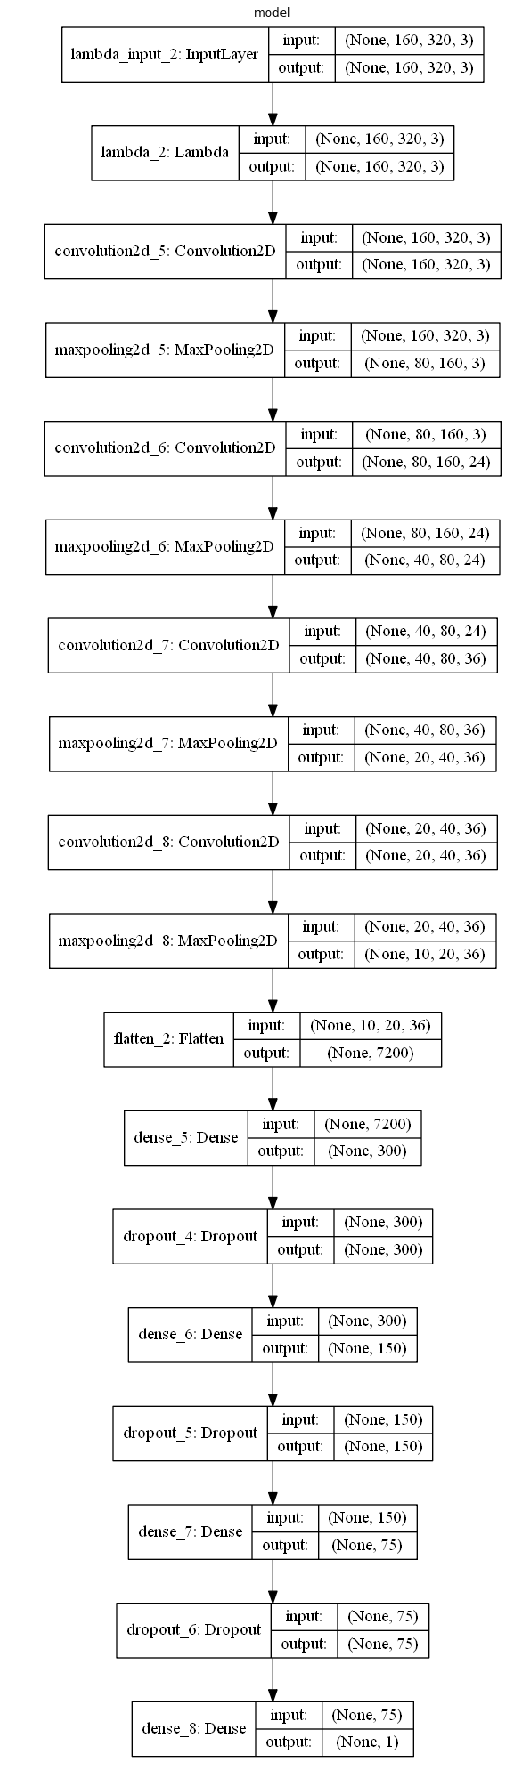

In [48]:
#plt.rc('figure', figsize=(32,32))
show_picture('./model_architecture.png', "model", (1,1), (0,0), axis_off=True)

The model, the summary and the learning epochs are shown below.

In [5]:
from keras.models import Sequential
from keras.layers import Activation, Flatten, Dense, Convolution2D, MaxPooling2D, Lambda, Cropping2D, Dropout, ELU
from keras.optimizers import Adam



model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320,3))) 
model.add(Convolution2D(3,3,3,border_mode='same',activation="relu"))
model.add(MaxPooling2D(dim_ordering='tf'))
model.add(Convolution2D(24,3,3,border_mode='same',activation="relu"))
model.add(MaxPooling2D(dim_ordering='tf'))
model.add(Convolution2D(36,3,3,border_mode='same',activation="relu"))
model.add(MaxPooling2D(dim_ordering='tf'))
model.add(Convolution2D(36,3,3,border_mode='same',activation="relu"))
model.add(MaxPooling2D(dim_ordering='tf'))
model.add(Flatten())
model.add(Dense(300))
model.add(Dropout(.5))
model.add(Dense(150))
model.add(Dropout(.5))
model.add(Dense(75))
model.add(Dropout(.5))
model.add(Dense(1))
optimizer = Adam(lr=0.001)
model.compile(loss='mse', optimizer=optimizer)
model.summary()



X_train = np.array(images)
y_train = np.array(steerings)

from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)


model.fit(X_train, y_train, validation_split=0.2,shuffle=True,nb_epoch=12, callbacks=[tensorboard])
model.save('model7.h5')


from keras.utils.visualize_util import plot
plot(model, to_file='model_architecture.png', show_shapes=True)



____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 160, 320, 3)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
convolution2d_5 (Convolution2D)  (None, 160, 320, 3)   84          lambda_2[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_5 (MaxPooling2D)    (None, 80, 160, 3)    0           convolution2d_5[0][0]            
____________________________________________________________________________________________________
convolution2d_6 (Convolution2D)  (None, 80, 160, 24)   672         maxpooling2d_5[0][0]             
___________________________________________________________________________________________

#### 3. Creation of the Training Set & Training Process

Most of the points I have explained above.

I noticed something when I created the training data. Due to the perspective shift of the central image left and right, you could remove the left and right camera. For the lower images, the distance between the left and the central camera does not yet match. In my experiments, I just wanted the leftmost image to submit my data with marginal information.

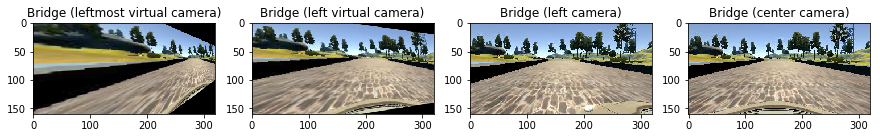

In [17]:
#http://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from PIL import Image
import math
%matplotlib inline

def show_picture2(image, title, grid, position):
    ax = plt.subplot2grid(grid, position)
    ax.imshow(image) 
    ax.set_title(title)
    

data_column_names = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
data_df2 = pd.read_csv('./data/driving_log.csv',header=0,names=data_column_names)

src_top_left = [0,20] 
src_top_right = [320,0]
src_bottom_left = [0,140]
src_bottom_right = [280,160]
 
dst_top_left = [0,0]
dst_top_right = [320,20]
dst_bottom_left = [0,160]
dst_bottom_right = [320,140]

src2_top_left = [0,40] 
src2_top_right = [320,0]
src2_bottom_left = [0,100]
src2_bottom_right = [280,160]


dst2_top_left = [0,0]
dst2_top_right = [320,40]
dst2_bottom_left = [0,160]
dst2_bottom_right = [320,100]


pts1 = np.float32([src_top_left,src_top_right,src_bottom_left,src_bottom_right])
pts2 = np.float32([dst_top_left,dst_top_right,dst_bottom_left,dst_bottom_right])

pts3 = np.float32([src2_top_left,src2_top_right,src2_bottom_left,src2_bottom_right])
pts4 = np.float32([dst2_top_left,dst2_top_right,dst2_bottom_left,dst2_bottom_right])


M1 = cv2.getPerspectiveTransform(pts1,pts2)
M2 = cv2.getPerspectiveTransform(pts3,pts4)

img_left = mpimg.imread('./data/IMG/left_2016_12_01_13_30_48_287.jpg') #[60:140,0:320]
img_center = mpimg.imread('./data/IMG/center_2016_12_01_13_30_48_287.jpg')


dst1 = cv2.warpPerspective(img_center,M1,(320,160)) #borderMode=cv2.BORDER_REPLICATE
dst2 = cv2.warpPerspective(img_center,M2,(320,160))

plt.rc('figure', figsize=(15,15))

show_picture2(dst2, "Bridge (leftmost virtual camera)", (1,4), (0,0))
show_picture2(dst1, "Bridge (left virtual camera)", (1,4), (0,1))
show_picture2(img_left, "Bridge (left camera)", (1,4), (0,2))
show_picture2(img_center, "Bridge (center camera)", (1,4), (0,3))


The following code and the two images show the flipping:

Flipping: source steering 0.6 and target steering -0.6


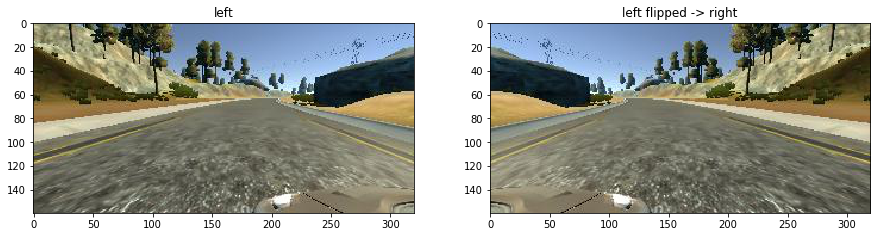

In [22]:
#flipping

from imgaug import augmenters as iaa

print("Flipping: source steering {} and target steering {}".format(0.6, -0.6))

flipper = iaa.Fliplr(1.0) # always horizontally flip each input image
img1_flip = flipper.augment_image(img1) # probably vertically flip image 1

plt.rc('figure', figsize=(15,15))

show_picture2(img1, "left", (1,2), (0,0))
show_picture2(img1_flip, "left flipped -> right", (1,2), (0,1))

The car in the video responds slowly of changing routes. The transitions between the bridge and the first sharp curve can still be improved. Perhaps this can be achieved through further Dense layers. I'll try that sometime.

In [24]:
%%HTML
<video width="640" height="480" controls>
  <source src="./run7_ok.mp4" type="video/mp4">
</video>
